In [8]:
from torchvision.datasets import Cityscapes
import torch
from torchvision import models
import numpy as np
from torchvision import transforms
import matplotlib.pyplot as plt
from PIL import Image

# Define your data transformation (you might need to customize these)
data_transforms = transforms.Compose([
    transforms.Resize((256, 256)),  # Resize images
    transforms.ToTensor(),  # Convert to tensor
])

# data_path = '/Users/severin/Documents/Projects/segmentation/cityscapes'
data_path = "C:\\Users\\sever\\Desktop\\segmentation\\cityscapes"

c:\Users\sever\Desktop\segmentation\cityscapes\.venv\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


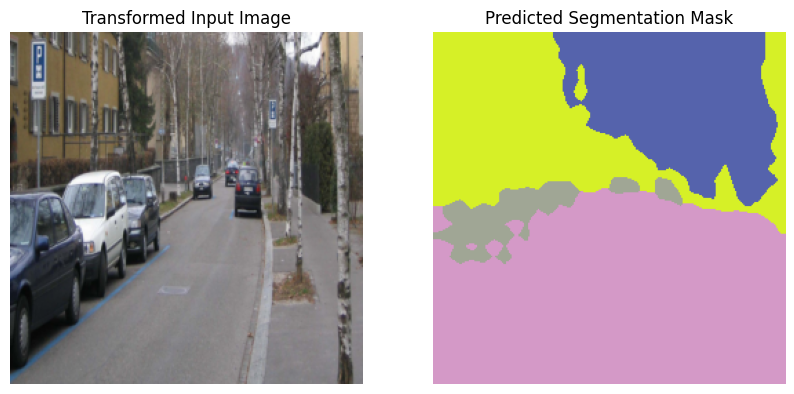

In [16]:
# Load the state dictionary
state_dict = torch.load('model_weights.pth')

# Remove keys related to auxiliary classifiers from the state dictionary
state_dict = {k: v for k, v in state_dict.items() if 'aux_classifier' not in k}

# Create your model and load the modified state dictionary
num_classes = len(Cityscapes.classes)
model = models.segmentation.fcn_resnet101(weights=False, num_classes=num_classes)
model.load_state_dict(state_dict, strict=False)  # Set strict=False to skip missing keys

# Load the input image
input_image = Image.open(f'{data_path}/real_images/1505513199437.jpg')

# Apply the necessary transformations
input_tensor = data_transforms(input_image).unsqueeze(0)

# Perform prediction
with torch.no_grad():
    outputs = model(input_tensor)['out']  # Correct 'inputs' to 'input_tensor'
    _, predicted = torch.max(outputs, 1)

# Convert the predicted image tensor to a numpy array
predicted_numpy = predicted.squeeze(0).cpu().numpy()

# Define label colors for 35 classes (replace this with your color mappings)
np.random.seed(42)
label_colors_35_classes = np.random.randint(0, 256, size=(35, 3), dtype=np.uint8)

# Convert the predicted segmentation mask to a colored mask
colored_mask = label_colors_35_classes[predicted_numpy]

# Convert the input tensor back to a numpy array for plotting
input_image_transformed = np.transpose(input_tensor.squeeze(0).cpu().numpy(), (1, 2, 0))

# Plot the transformed input image and the colored mask
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(input_image_transformed)
axs[0].axis('off')
axs[0].set_title('Transformed Input Image')
axs[1].imshow(colored_mask)
axs[1].axis('off')
axs[1].set_title('Predicted Segmentation Mask')

plt.show()

Text(0.5, 1.0, 'Predicted Segmentation Mask')

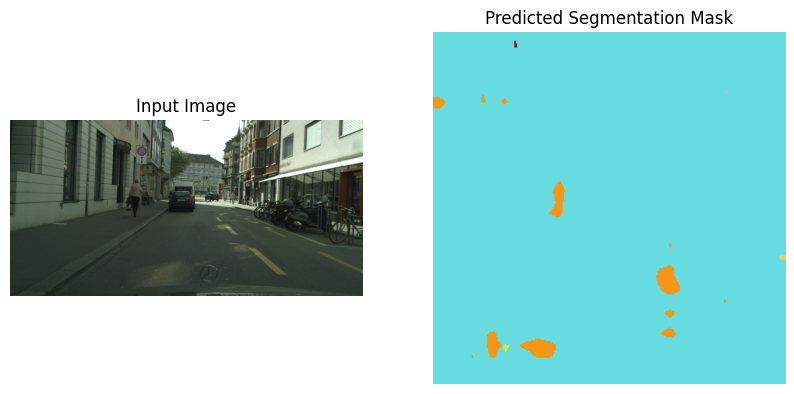

In [14]:
# Create your model and load the modified state dictionary
num_classes = len(Cityscapes.classes)
model = models.segmentation.fcn_resnet101(weights=True, num_classes=21)

# Load the input image
input_image = Image.open(f'{data_path}/leftImg8bit/train/zurich/zurich_000017_000019_leftImg8bit.png')

# Apply the necessary transformations
input_tensor = data_transforms(input_image).unsqueeze(0)

# Perform prediction
with torch.no_grad():
    outputs = model(input_tensor)['out']  # Correct 'inputs' to 'input_tensor'
    _, predicted = torch.max(outputs, 1)

# Convert the predicted image tensor to a numpy array
predicted_numpy = predicted.squeeze(0).cpu().numpy()

# Define label colors for 35 classes (replace this with your color mappings)
np.random.seed(42)
label_colors_21_classes = np.random.randint(0, 256, size=(21, 3), dtype=np.uint8)

# Convert the predicted segmentation mask to a colored mask
colored_mask = label_colors_21_classes[predicted_numpy]

# Plot the original input image and the colored mask
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(input_image)
axs[0].axis('off')
axs[0].set_title('Input Image')
axs[1].imshow(colored_mask)
axs[1].axis('off')
axs[1].set_title('Predicted Segmentation Mask')